In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=a7fed94522532ecf8ea08d2a1980a257b59f97b765e437e3a5d8481567d75b8f
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt


In [4]:
doge = yf.Ticker("DOGE-USD")
bitcoin = yf.Ticker("BTC-USD")
etherum = yf.Ticker("ETH-USD")

In [5]:
doge_data = doge.history('6mo')
bitcoin_data = bitcoin.history('6mo')
etherum_data = etherum.history('6mo')


Text(0.5, 1.0, 'Dogecoin Prices 2021')

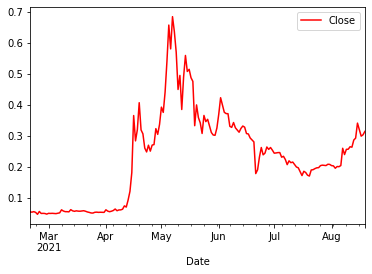

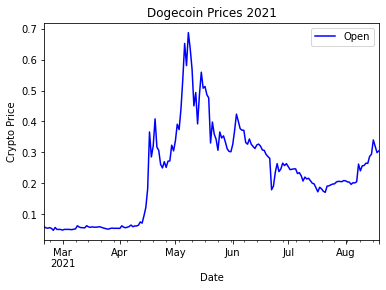

In [6]:
doge_data.reset_index(inplace=True)
#doge_data['Open'].plot()
doge_data.plot(x="Date", y="Close", color = 'red')
doge_data.plot(x='Date', y='Open', color = 'blue')
#doge_data['Open'].plot()

plt.ylabel("Crypto Price")
plt.title("Dogecoin Prices 2021")

In [7]:
doge_data = doge.history(period="max")
doge_2021 = doge_data.loc['2021']
bitcoin_2021 = bitcoin_data.loc['2021']
etherum_2021 = etherum_data.loc['2021']

doge_2021


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,228961515,0,0
2021-01-02,0.005686,0.013698,0.005584,0.010615,3421562680,0,0
2021-01-03,0.010602,0.013867,0.009409,0.009771,2707003608,0,0
2021-01-04,0.009785,0.011421,0.007878,0.009767,1372398979,0,0
2021-01-05,0.009767,0.010219,0.008972,0.009920,687256067,0,0
...,...,...,...,...,...,...,...
2021-08-15,0.294086,0.348722,0.287063,0.341441,8046171669,0,0
2021-08-16,0.340165,0.350953,0.310828,0.320715,6681324187,0,0
2021-08-17,0.319631,0.339462,0.295763,0.299442,5699700481,0,0


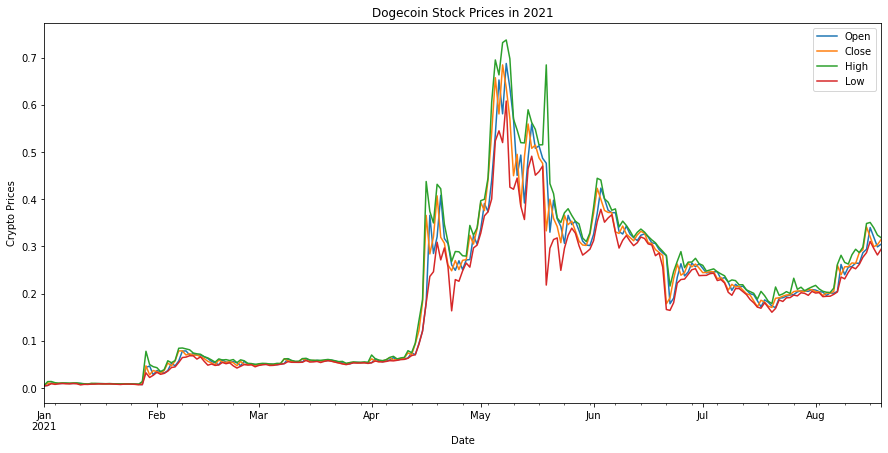

In [8]:
#kk.reset_index(inplace=True)
doge_2021['Open'].plot(label = 'Open', figsize = (15,7))
doge_2021['Close'].plot(label = 'Close')
doge_2021['High'].plot(label = 'High')
doge_2021['Low'].plot(label = 'Low')
#kk.plot(x="Date", y="Close")
plt.legend()
plt.ylabel("Crypto Prices")
plt.title("Dogecoin Stock Prices in 2021")
plt.show()

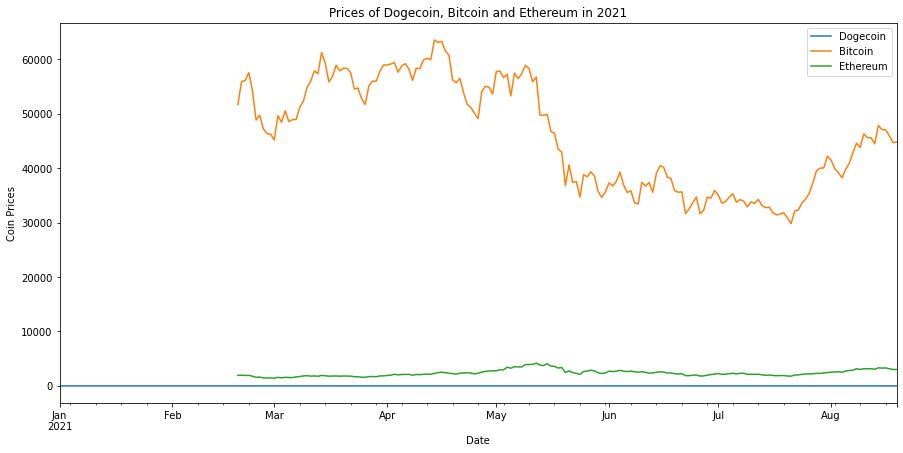

In [9]:
#kk.reset_index(inplace=True)
doge_2021['Open'].plot(label = 'Dogecoin', figsize = (15,7))
bitcoin_2021['Open'].plot(label = 'Bitcoin')
etherum_2021['Open'].plot(label = 'Ethereum')

#kk.plot(x="Date", y="Close")
plt.legend()
plt.ylabel("Coin Prices")
plt.title("Prices of Dogecoin, Bitcoin and Ethereum in 2021")
plt.show()

#plotting the opening prices would not be expressive as bitcoin is on a 
#completely different scale than ethereum and dogecoin which both are also on 
#different scales
# so any small changes of dogecoin we can not visualize here so it's best to plot on one scale

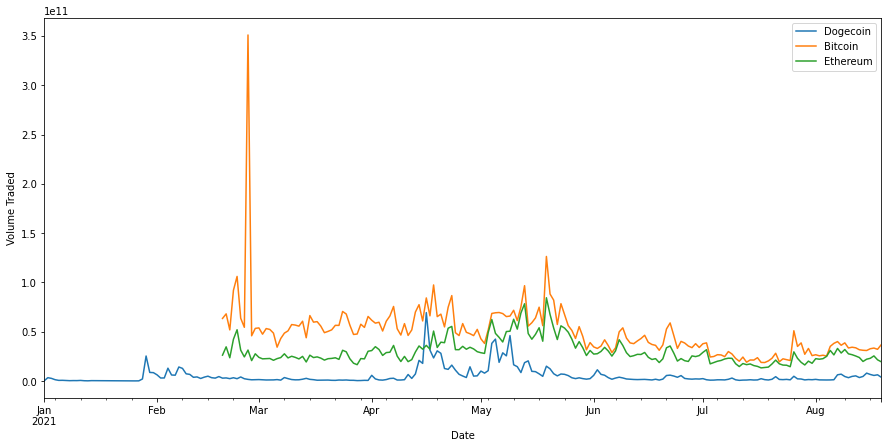

In [10]:
doge_2021['Volume'].plot(label = 'Dogecoin', figsize = (15,7))
bitcoin_2021['Volume'].plot(label = 'Bitcoin', figsize = (15,7))
etherum_2021['Volume'].plot(label = 'Ethereum', figsize = (15,7))
plt.legend()
plt.ylabel("Volume Traded")

plt.show()

# doge price increase around april 20 with talk of doge day 420? 
#explore what was happening in the news and social media during this period



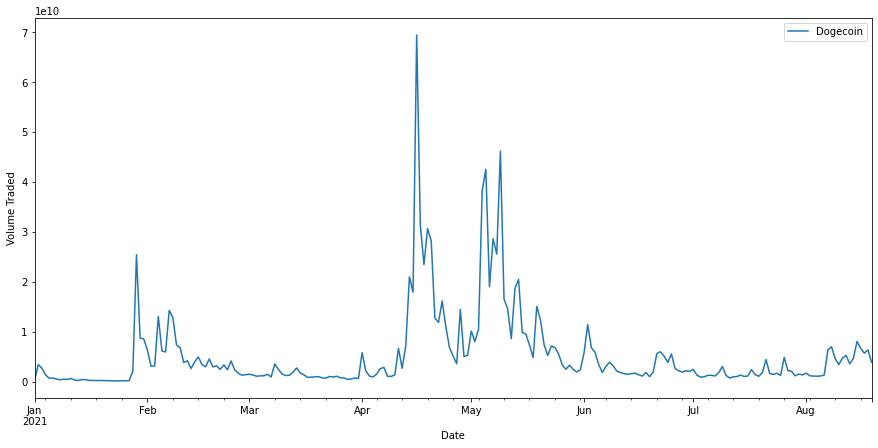

In [11]:
doge_2021['Volume'].plot(label = 'Dogecoin', figsize = (15,7))
plt.legend()
plt.ylabel("Volume Traded")

plt.show()


In [12]:
doge_2021['Volume'].argmax()

105

In [13]:
doge_2021.iloc[[doge_2021['Volume'].argmax()]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-16,0.181587,0.4377,0.180488,0.36587,69410680685,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

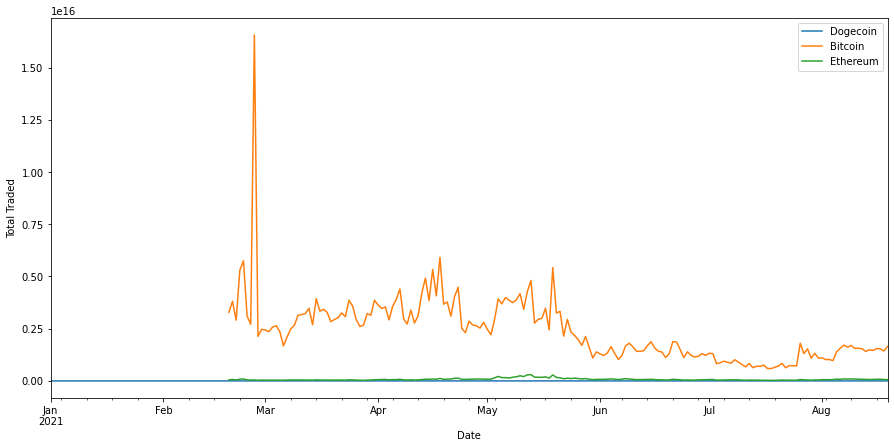

In [14]:
doge_2021['Total Traded'] = doge_2021['Open'] * doge_2021['Volume']
bitcoin_2021['Total Traded'] = bitcoin_2021['Open'] * bitcoin_2021['Volume']
etherum_2021['Total Traded'] = etherum_2021['Open'] * etherum_2021['Volume']

doge_2021['Total Traded'].plot(label = 'Dogecoin', figsize = (15,7))
bitcoin_2021['Total Traded'].plot(label = 'Bitcoin', figsize = (15,7))
etherum_2021['Total Traded'].plot(label = 'Ethereum', figsize = (15,7))
plt.legend()
plt.ylabel("Total Traded")

plt.show()
# total market cap and not just stock price 
# what is more valuable? so we are going to calculate to represent the total money traded
# by multiplying the open price and the volume. We will store these as a new column called Total Traded
# 

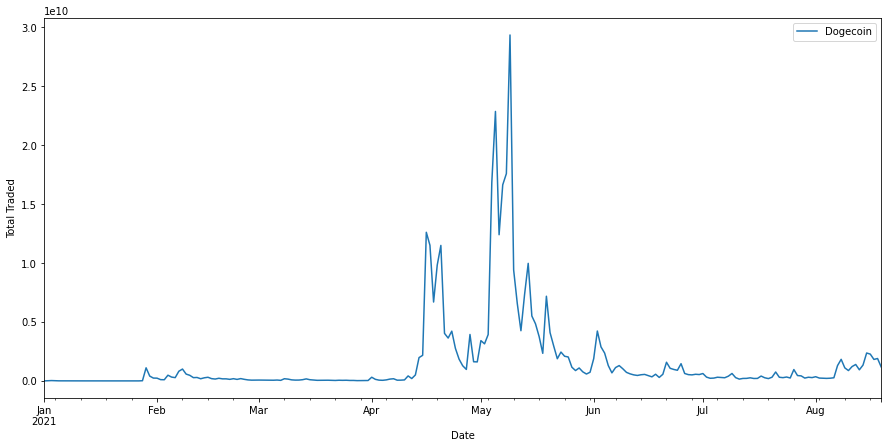

In [15]:
doge_2021['Total Traded'].plot(label = 'Dogecoin', figsize = (15,7))
#bitcoin_2021['Total Traded'].plot(label = 'Bitcoin', figsize = (15,7))
#etherum_2021['Total Traded'].plot(label = 'Etherum', figsize = (15,7))
plt.legend()
plt.ylabel("Total Traded")

plt.show()

In [16]:
doge_2021['Total Traded'].argmax()

128

In [17]:
doge_2021.iloc[[doge_2021['Total Traded'].argmax()]]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
Date,,,,,,,,
2021-05-09,0.63582,0.697625,0.425706,0.57007,46138063928,0,0,2.933550e+10


In [18]:
from pandas.plotting import scatter_matrix
crypto_comp = pd.concat([doge_2021['Open'], bitcoin_2021['Open'], etherum_2021['Open']], axis=1)
crypto_comp.columns = ['Dogecoin Open', 'Bitcoin Open', 'Ethereum Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faef19b5550>,
      dtype=object)

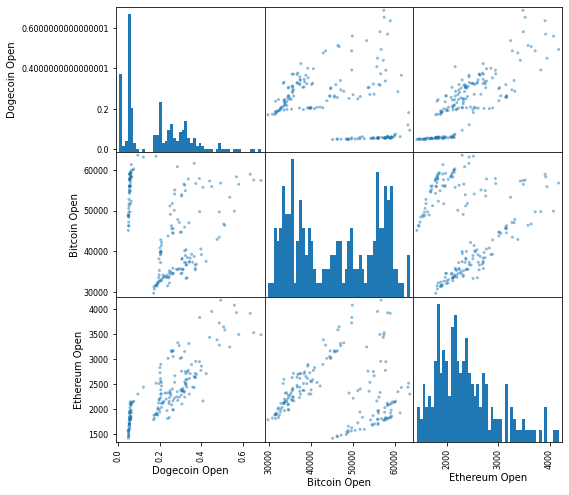

In [19]:
scatter_matrix(crypto_comp, figsize=(8,8), hist_kwds={'bins':50})
# using scatter matrix from panads we can look for correlation between bit...
# we first concatinated the OPen prices of bitt... and then plotted the scatter matrix
# we can view stock prices as random variables and scatter matrices determain if we have a linear correlation between one or more vairbale
#and it is helpful in pinpointing any specific correlation between different types of data
# so we can seethat dogecoin and ethereum might sort oc be related as the scatted plots can come u with a straight line and since it is going up it is positively correlated
# with bitcoin and dogecoin there is some nonlinear thing happening and there is basically no correlation
# linear correlation maybe between doge coin and etherum but definitely not perfect, and the bitcoin and doge coin no correlation

In [20]:
!pip install mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

#candlestick is  a type of financial chart used to describe price movements of a certain stock price or currency metric
#

([<matplotlib.lines.Line2D at 0x7faef35bc810>,
  <matplotlib.patches.Rectangle at 0x7faeef4aa410>])

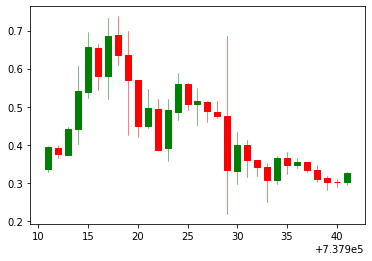

In [21]:
doge_2021_reset = doge_2021.loc['2021-05':'2021-05'].reset_index()
doge_2021_reset['date_ax'] = doge_2021_reset['Date'].apply(lambda date: date2num(date))
doge_2021_values = [tuple(vals) for vals in doge_2021_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, doge_2021_values, width = 0.6, colorup='g', colordown='r')

Daily percentage change
given by the formula ..... 
so the rt is the return at time t and it is equal to the price at time t divided by the price at time t-1 - 1. this value reports a percentage gain or loss. if you bought the stock on day t-1 and sold at day t so if you gain pt should be greater than pt-1 and the ratio pt/pt-1 would be positive and thus rt would be positive. the larger rt the better for you. 
now even though this is not helpful to attempt predict future values of the sock it is helpful to analyze the volatitly of the stock. let's say the daily returns have a wide distribution the stock is more volotile so now, igven this pieve of information about daily percentage change let's calculate the percentage returns and plot them on a histograms and based on the historgrams we can decide which stock is the most stable. let's say you want to invest in some stocks that are stable you do not want volotaliy you don't want to take a large risk so this study could helpful for these kind of situations. you want to invest in some things that have stability. it can be stability on the long ron. the way we do this is by creating a new column called returns where we do close price on certain day/ close price on the day before  and -1. 

so we plot on a histogram. now the fatter this is the more volatile it is.  the width of this bell shape is relatied to the std devation of the distribution the higher it is the more variance we have. the variance of a certain distribution is directily related to the std decation. so the higher the std devation the higher the vriane so the more volatility we have in term of stock analysis. 

so we will do the same for the other crypto currencies and plot them on the same plot . so looking at this figure we can see that doge is actually wider than the other two. and that is because doge is more volatile than the other two. 

let's try to smooth this plot down using KDE. Kernel density estimate plot. it takes in a histogram and it tries to fit a certain kernel . as you can see this is the plot/kernel that best fits the histogram for each. this is a kernel and represents a certain probabilty distribution cunction. so what we see is a probabiltiy density function compared to the histogram which is unnormalized and the kde is normalized so the areas of each of the densities is constant. so this would make it better for comparison. so the KDE curve of doge is fatter than the restand bitcoin n eth are almost as stable as each other as the widht of both are almost the same. 

Here we can use box plots. since box plots so we can see the dailty percentage of doge is way more spread out than that of the other two which means that within this period of time, doge seems to be more volotile than the other two.

we can now use these box dfs in order to see if there is a correlation between the stocks dialy returns of the three coinds. so this might answe the quesiton how related these three coins are in terms of volatily or stability. 
we can do this using scatter matrix like before. 


In [22]:
doge_2021['returns'] = (doge_2021['Close']/doge_2021['Close'].shift(1))-1
bitcoin_2021['returns'] = (bitcoin_2021['Close']/bitcoin_2021['Close'].shift(1))-1
etherum_2021['returns'] = (etherum_2021['Close']/etherum_2021['Close'].shift(1))-1
doge_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,returns
Date,,,,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,228961515,0,0,1.071769e+06,NaN
2021-01-02,0.005686,0.013698,0.005584,0.010615,3421562680,0,0,1.945501e+07,0.867194
2021-01-03,0.010602,0.013867,0.009409,0.009771,2707003608,0,0,2.869965e+07,-0.079510
2021-01-04,0.009785,0.011421,0.007878,0.009767,1372398979,0,0,1.342892e+07,-0.000409
2021-01-05,0.009767,0.010219,0.008972,0.009920,687256067,0,0,6.712430e+06,0.015665


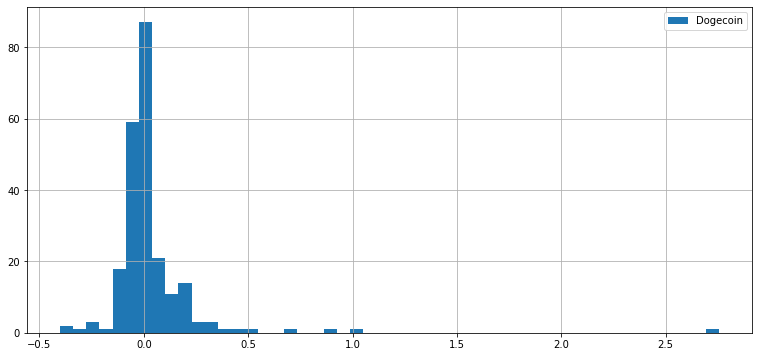

In [23]:
doge_2021['returns'].hist(bins=50, label = 'Dogecoin', figsize = (13,6))
plt.legend()

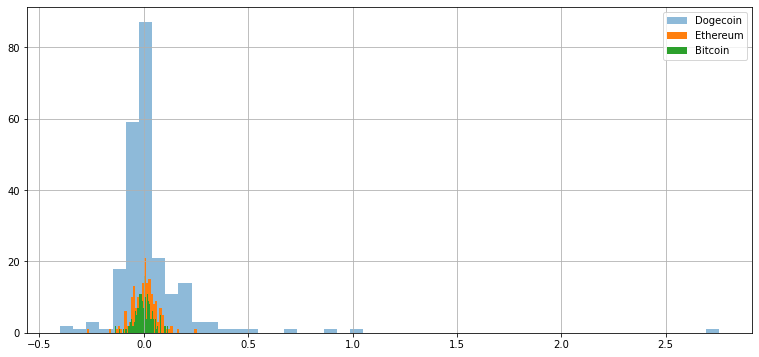

In [24]:
doge_2021['returns'].hist(bins=50, label = 'Dogecoin', alpha = 0.5, figsize = (13,6))
etherum_2021['returns'].hist(bins=50, label = 'Ethereum')
bitcoin_2021['returns'].hist(bins=50, label = 'Bitcoin')
plt.legend()
# doge is wider cuz doge is more voltile than etherum and bitcoin

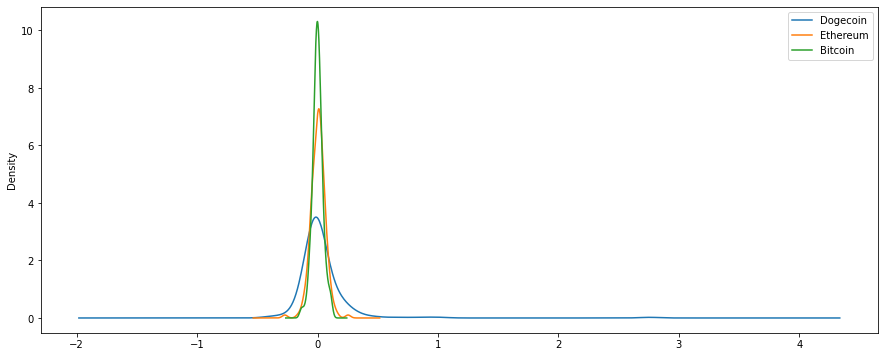

In [25]:
doge_2021['returns'].plot(kind='kde', label='Dogecoin', figsize = (15,6))
etherum_2021['returns'].plot(kind='kde', label='Ethereum')
bitcoin_2021['returns'].plot(kind='kde', label='Bitcoin')
plt.legend()
#etherum and bitcoin are more stable
#probabilty density function KDE is normalized so the are is constant thus good for comparison

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


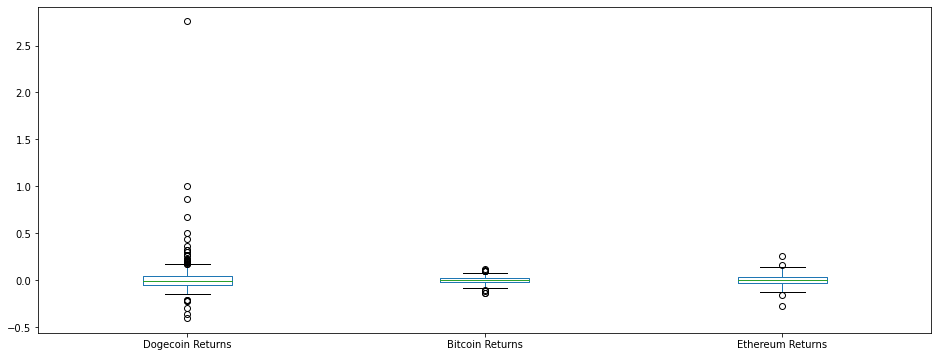

In [26]:
box_df = pd.concat([doge_2021['returns'], bitcoin_2021['returns'], etherum_2021['returns']], axis = 1)
box_df.columns=['Dogecoin Returns', 'Bitcoin Returns', 'Ethereum Returns']
box_df.plot(kind='box', figsize = (16,6))
#the daily percentage change of doge is way spread out than that of bitcoin and eth so over this period of time doge seems to be more volotile than bitcoin and etherum

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faedf06ae90>,
      dtype=object)

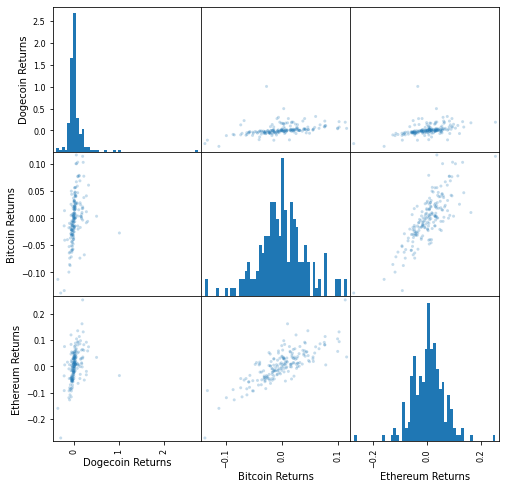

In [27]:
scatter_matrix(box_df, figsize=(8,8), hist_kwds={'bins': 50}, alpha=0.25) 

In [28]:
doge_2021['Cumulative Reuturn'] = (1 + doge_2021['returns']).cumprod()
bitcoin_2021['Cumulative Reuturn'] = (1 + bitcoin_2021['returns']).cumprod()
etherum_2021['Cumulative Reuturn'] = (1 + etherum_2021['returns']).cumprod()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Cumulative reutrn can be calculated by adding (1+ doge(return)) multipied by the previous cumulative reutrn which we can use cumprod() for this recursion. so we can now plot the cumulative return for each coin. so this plot is showing the cumultive reurn vs time. so if you invested one dollar on jan 2021 the amount you would have today / how much that one dollar is worth today. 
so which stock shoed the hgihest reurn for $1 invested and for us that would be doge coin . while the other two are more stable


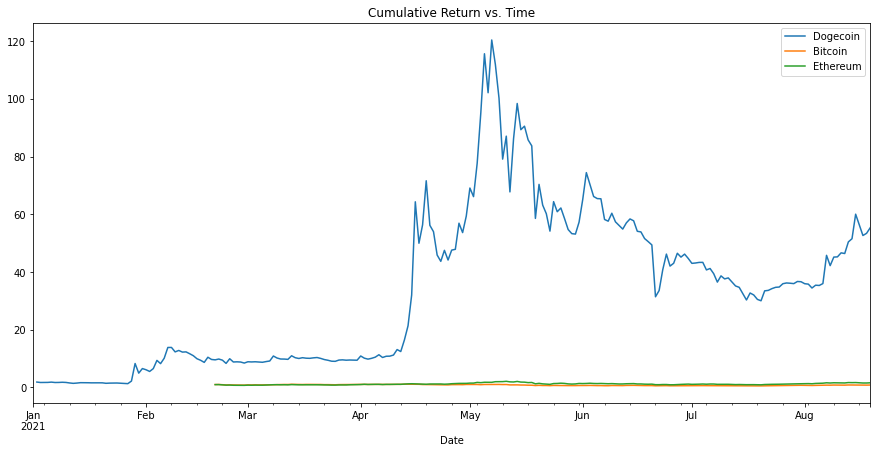

In [29]:
doge_2021['Cumulative Reuturn'].plot(label='Dogecoin', figsize=(15,7))
bitcoin_2021['Cumulative Reuturn'].plot(label='Bitcoin')
etherum_2021['Cumulative Reuturn'].plot(label='Ethereum')
plt.title('Cumulative Return vs. Time')
plt.legend()
# if you invested $1 in 01-2021 the most you would return is from doge and that $1 would be worth around 43 today

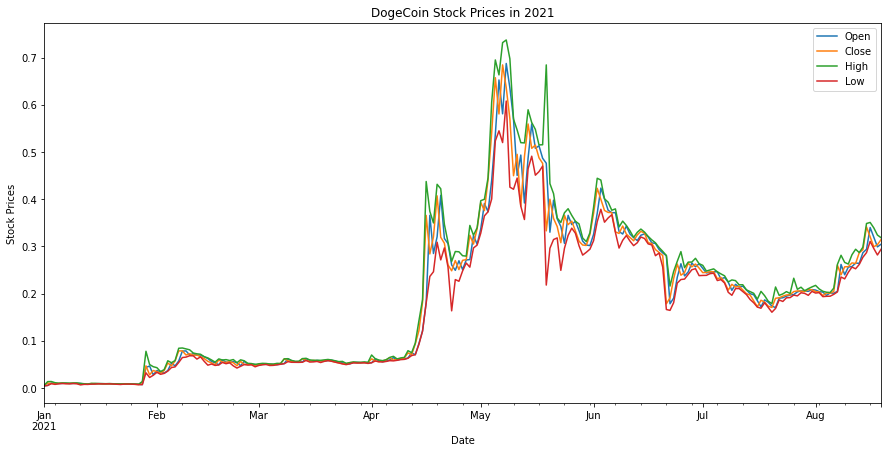

In [30]:
#kk.reset_index(inplace=True)
doge_2021['Open'].plot(label = 'Open', figsize = (15,7))
doge_2021['Close'].plot(label = 'Close')
doge_2021['High'].plot(label = 'High')
doge_2021['Low'].plot(label = 'Low')
#kk.plot(x="Date", y="Close")
plt.legend()
plt.ylabel("Stock Prices")
plt.title("DogeCoin Stock Prices in 2021")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


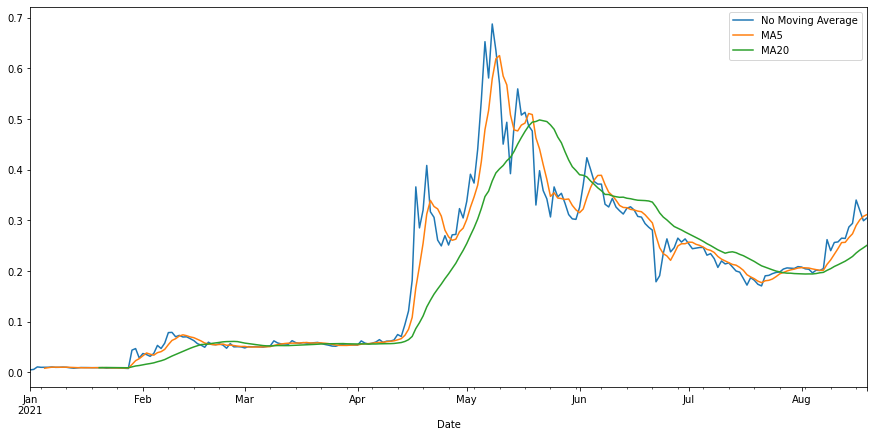

In [31]:
doge_2021['Open'].plot(label = 'No Moving Average', figsize = (15,7))
doge_2021['MA20'] = doge_2021['Open'].rolling(20).mean()
doge_2021['MA5'] = doge_2021['Open'].rolling(5).mean()
doge_2021['MA5'].plot(label = 'MA5')
doge_2021['MA20'].plot(label = 'MA20')
plt.legend()
plt.show()
# the data might be very noisy, so data might not be reliable, so moving average comes in
# moving average is a clasical smooting method in time series it is a way to make data more robust against noise
# Can try auto regression or auto regression plus moving average to make this better not to have too high or too low

#create a new column for MA5 so the size of the window we will smooth over is 5 samples
# as you can see it is more smooth as if the noise has been componsated for.
# if we move the MA to a value of 20 we can see you might miss out on some trends since the MA is too high


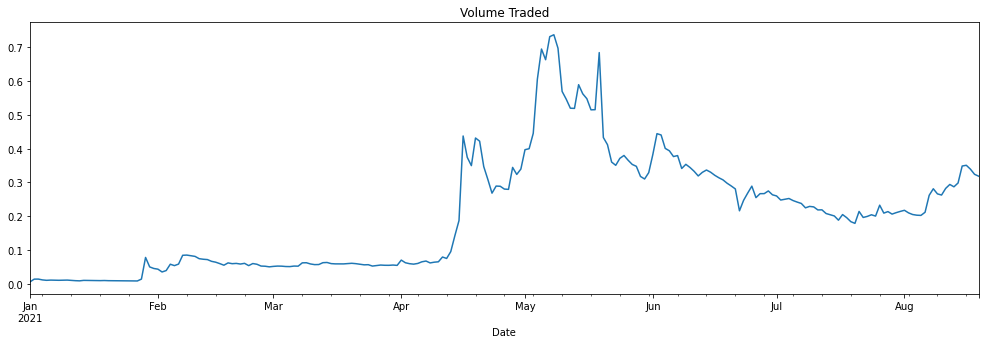

In [32]:
doge_2021['High'].plot( figsize = (17,5))

plt.title("Volume Traded")
plt.show()

In [123]:
from sklearn.svm import SVR
future_days = 10

In [124]:
doge_2021[str(future_days)+'_Day_Price_Forecast'] = doge_2021[['Close']].shift(-future_days)
doge_2021[['Close', str(future_days)+'_Day_Price_Forecast']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,10_Day_Price_Forecast
Date,,
2021-01-01,0.005685,0.008835
2021-01-02,0.010615,0.008063
2021-01-03,0.009771,0.008616
2021-01-04,0.009767,0.009397
2021-01-05,0.009920,0.009369
...,...,...
2021-08-15,0.341441,NaN
2021-08-16,0.320715,NaN
2021-08-17,0.299442,NaN


In [125]:
import numpy as np
X = np.array(doge_2021[['Close']])
X = X[:doge_2021.shape[0] - future_days]



In [36]:
X = np.array(doge_2021[['Close']])
X = X[:doge_2021.shape[0] - future_days]


In [37]:
y = np.array(doge_2021[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [39]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)


svr_rbf accuracy: 0.500004816625683


In [41]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[0.37555713 0.24504414 0.31840365 0.31299014 0.47312531 0.10607663
 0.14317111 0.28525981 0.47906801 0.14159163 0.26274494 0.13865941
 0.13872438 0.14546029 0.14805638 0.39424697 0.24972153 0.10674453
 0.13621168 0.28578897 0.15546314 0.29871135 0.13863234 0.34590461
 0.14742927 0.34512708 0.10728469 0.35338067 0.43861486 0.40946739
 0.3117549  0.14196037 0.30993337 0.14411665 0.10637188 0.25829691
 0.14400683 0.3485132  0.42299243 0.15397238 0.10733833 0.34315478
 0.3448483  0.34642692 0.30043694]


In [42]:
print(y_test)

[0.30516899 0.204437   0.68477702 0.224126   0.366162   0.037196
 0.050592   0.18488801 0.333123   0.061684   0.256897   0.057998
 0.052122   0.28417301 0.056555   0.40019399 0.28680801 0.047162
 0.056591   0.246411   0.054384   0.19732399 0.058592   0.2809
 0.407318   0.23217399 0.009171   0.37632301 0.35369301 0.311205
 0.219864   0.050262   0.29944199 0.053657   0.03152    0.26526299
 0.051448   0.30311    0.359382   0.26096699 0.009369   0.33756101
 0.63643903 0.29347199 0.44170699]


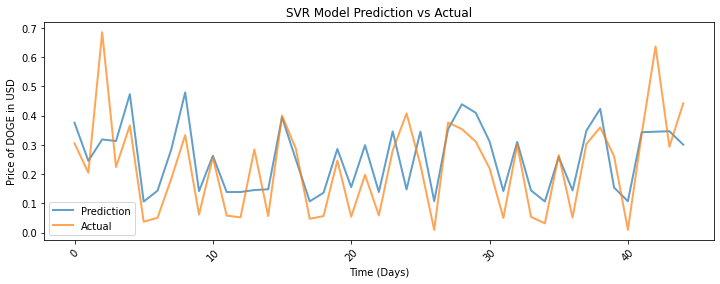

In [43]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('SVR Model Prediction vs Actual')
plt.ylabel('Price of DOGE in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr_confidence = lr.score(x_test, y_test)
print("lr accuracy:", lr_confidence)

lr accuracy: 0.4587216784382974


In [46]:
lr_prediction = lr.predict(x_test)
print(lr_prediction)

[0.3819975  0.20135093 0.26899253 0.26252149 0.50934951 0.0481992
 0.08818455 0.23506175 0.51810193 0.08644511 0.21600068 0.08325307
 0.08332332 0.09073349 0.09366796 0.41766101 0.20525129 0.0489786
 0.0806205  0.23553006 0.10233087 0.24749623 0.0832238  0.31428733
 0.09295462 0.31264073 0.04960413 0.33097174 0.4719608  0.43953027
 0.26111572 0.08684986 0.25908524 0.08923323 0.04854458 0.21233449
 0.08911113 0.31995055 0.45551639 0.10055045 0.04966601 0.30855806
 0.31205535 0.31540459 0.24919052]


In [47]:
print(y_test)

[0.30516899 0.204437   0.68477702 0.224126   0.366162   0.037196
 0.050592   0.18488801 0.333123   0.061684   0.256897   0.057998
 0.052122   0.28417301 0.056555   0.40019399 0.28680801 0.047162
 0.056591   0.246411   0.054384   0.19732399 0.058592   0.2809
 0.407318   0.23217399 0.009171   0.37632301 0.35369301 0.311205
 0.219864   0.050262   0.29944199 0.053657   0.03152    0.26526299
 0.051448   0.30311    0.359382   0.26096699 0.009369   0.33756101
 0.63643903 0.29347199 0.44170699]


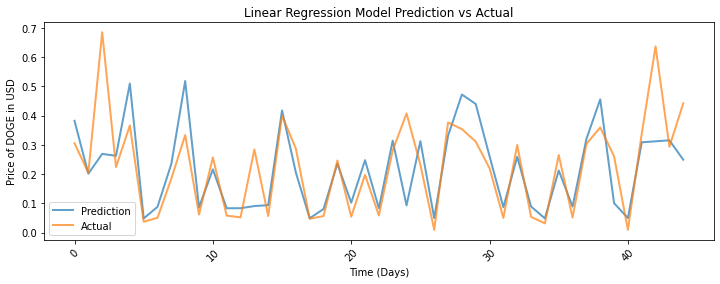

In [48]:
plt.figure(figsize=(12,4))
plt.plot(lr_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Linear Regression Model Prediction vs Actual')
plt.ylabel('Price of DOGE in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [50]:
tree_confidence = tree.score(x_test, y_test)
print("Decision tree accuracy:", tree_confidence)

Decision tree accuracy: 0.5730092551690775


In [51]:
tree_prediction = tree.predict(x_test)
print(tree_prediction)

[0.30222401 0.24526399 0.58080399 0.246483   0.55960399 0.046935
 0.058961   0.172345   0.51489502 0.059696   0.25732499 0.055349
 0.055349   0.053926   0.053556   0.490374   0.2036     0.007482
 0.078825   0.172345   0.306925   0.200003   0.055349   0.32635099
 0.32047501 0.32635099 0.00903286 0.28735599 0.346302   0.33294499
 0.246483   0.064458   0.376046   0.053698   0.008579   0.200974
 0.053698   0.37180701 0.30807099 0.055139   0.00903286 0.178691
 0.32635099 0.239153   0.200003  ]


In [52]:
print(y_test)

[0.30516899 0.204437   0.68477702 0.224126   0.366162   0.037196
 0.050592   0.18488801 0.333123   0.061684   0.256897   0.057998
 0.052122   0.28417301 0.056555   0.40019399 0.28680801 0.047162
 0.056591   0.246411   0.054384   0.19732399 0.058592   0.2809
 0.407318   0.23217399 0.009171   0.37632301 0.35369301 0.311205
 0.219864   0.050262   0.29944199 0.053657   0.03152    0.26526299
 0.051448   0.30311    0.359382   0.26096699 0.009369   0.33756101
 0.63643903 0.29347199 0.44170699]


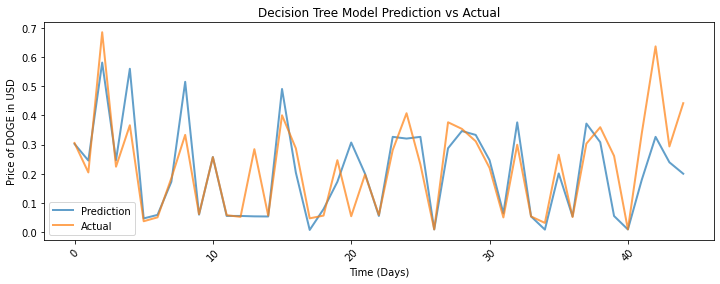

In [53]:
plt.figure(figsize=(12,4))
plt.plot(tree_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Decision Tree Model Prediction vs Actual')
plt.ylabel('Price of DOGE in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [55]:
rf_confidence = rf.score(x_test, y_test)
print("rf confidence:", rf_confidence)

rf confidence: 0.6459446251359748


In [56]:
rf_prediction = rf.predict(x_test)
print(rf_prediction)

[0.32517653 0.23058999 0.52797758 0.31277325 0.52092028 0.03798321
 0.06121295 0.18534591 0.50730305 0.05929782 0.23640194 0.05735831
 0.05769229 0.05547566 0.07276718 0.42349383 0.20157087 0.01329452
 0.06794079 0.19872901 0.21663472 0.20919046 0.05735831 0.30450273
 0.22496427 0.31460613 0.00900763 0.32158184 0.35743123 0.33283418
 0.2855298  0.06311306 0.33343705 0.06990901 0.01823863 0.22289393
 0.06946026 0.34222208 0.32706922 0.06398582 0.00900864 0.22834982
 0.31146211 0.26903591 0.30348241]


In [57]:
print(y_test)

[0.30516899 0.204437   0.68477702 0.224126   0.366162   0.037196
 0.050592   0.18488801 0.333123   0.061684   0.256897   0.057998
 0.052122   0.28417301 0.056555   0.40019399 0.28680801 0.047162
 0.056591   0.246411   0.054384   0.19732399 0.058592   0.2809
 0.407318   0.23217399 0.009171   0.37632301 0.35369301 0.311205
 0.219864   0.050262   0.29944199 0.053657   0.03152    0.26526299
 0.051448   0.30311    0.359382   0.26096699 0.009369   0.33756101
 0.63643903 0.29347199 0.44170699]


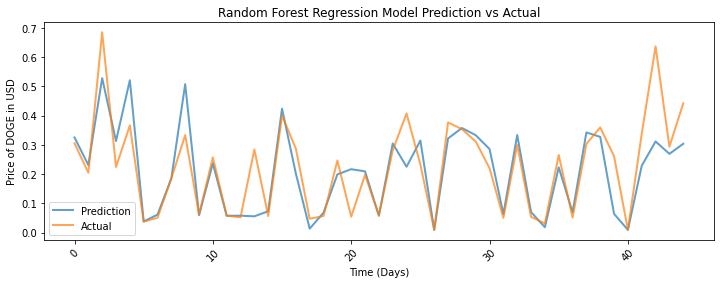

In [58]:
plt.figure(figsize=(12,4))
plt.plot(rf_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Random Forest Regression Model Prediction vs Actual')
plt.ylabel('Price of DOGE in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [59]:
doge_2021['Return'] = doge_2021['Close'].pct_change(60).shift(-60)
list_features = ['High', 'Low', 'Close', 'Volume']
X = doge_2021[list_features]
y = np.where(doge_2021.Return > 0, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 423)


In [61]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
y_pred = treeClassifier.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.93      0.96      0.95        27

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70



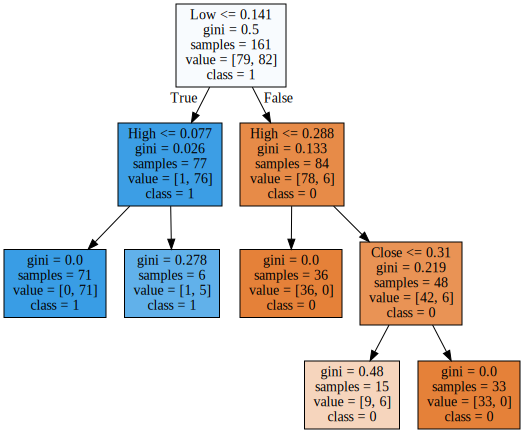

In [64]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(treeClassifier,filled=True,feature_names=list_features,class_names=np.array(['0','1']))
graphviz.Source(data)

In [65]:
#import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} tweepy

# accessing Twitter API

import tweepy
auth = tweepy.OAuthHandler('oKsJrSACxit8YoTDM6MPzJvnN', 'rzxMMIQfsSREzD1mQRpvwWEaxPze77mgHbvbDLKsH8cFdN7MtP')
auth.set_access_token('1132508173603102720-8EnFZzrBO1iDoNzM8YmBilfn0LDAM8', 'xr30m23x1hjrGa7oSwEuxyOAbnEvfhZlVj0IKWxlB7cnl')

api = tweepy.API(auth)

In [66]:
import pandas as pd
import re
import matplotlib.pyplot as plt

#Data Fetching
#This searched the first 100 tweets with the text "blacklivesmatter", "alllivesmatter", "bluelivesmatter", "whitelivesmatter"

doge_tweets = api.search('doge',lang = "en", since= "2021-06-29")
doge_tweets


[Status(_api=<tweepy.api.API object at 0x7faed9b32850>, _json={'created_at': 'Thu Aug 19 21:34:04 +0000 2021', 'id': 1428470344797593605, 'id_str': '1428470344797593605', 'text': 'RT @mgunit13: @CryptoManiac84 Believe me this is the project you should get into!!! #MiniDoge #doge Apps being released like MiniCRUSH, Min…', 'truncated': False, 'entities': {'hashtags': [{'text': 'MiniDoge', 'indices': [84, 93]}, {'text': 'doge', 'indices': [94, 99]}], 'symbols': [], 'user_mentions': [{'screen_name': 'mgunit13', 'name': 'Mgunit13', 'id': 1393932472614854659, 'id_str': '1393932472614854659', 'indices': [3, 12]}, {'screen_name': 'CryptoManiac84', 'name': 'Crypto Maniac', 'id': 1401875921754337282, 'id_str': '1401875921754337282', 'indices': [14, 29]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in

In [67]:
search_query = "dogecoin -filter:retweets"
tweets = tweepy.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-06-01").items(500)

In [68]:
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 500


In [69]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,BULL MARKET,,,False,2021-08-19 21:34:03,DogeCoin (DOGE) - USDT - Live streaming exchan...,None,Twitter Web App
1,Alishba,,,False,2021-08-19 21:34:02,Unity Protocol \n Introducing 1 to 1 Support f...,None,Twitter for Android
2,Parasite,,Please be advised that this is my personal shi...,False,2021-08-19 21:33:38,@MrBeast I would take the 10 grand but only if...,None,Twitter for iPhone
3,Dogecoin Evolution,Canada,Follow for progress updates!\nLaunched: https:...,False,2021-08-19 21:33:38,@DogeGirl420 @Oonabot Not even that video can ...,None,Twitter Web App
4,Akif Özsoy,"California, USA",Computer Engineer,False,2021-08-19 21:33:36,@dogecoin_empire Perfect #doge 🐶,[doge],Twitter for iPhone


In [70]:
len(tweets_df)

500

Try the models for etherum 


In [71]:
from sklearn.svm import SVR
future_days = 10

In [72]:
etherum_2021[str(future_days)+'_Day_Price_Forecast'] = etherum_2021[['Close']].shift(-future_days)
etherum_2021[['Close', str(future_days)+'_Day_Price_Forecast']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,10_Day_Price_Forecast
Date,,
2021-02-19,1960.164795,1564.707642
2021-02-20,1919.534058,1492.608765
2021-02-21,1935.601074,1575.853149
2021-02-22,1781.992920,1541.914307
2021-02-23,1570.203979,1533.275024
...,...,...
2021-08-15,3310.504150,NaN
2021-08-16,3156.509521,NaN
2021-08-17,3014.845947,NaN


In [73]:
import numpy as np
X = np.array(etherum_2021[['Close']])
X = X[:etherum_2021.shape[0] - future_days]



In [74]:
X = np.array(etherum_2021[['Close']])
X = X[:etherum_2021.shape[0] - future_days]


In [75]:
y = np.array(etherum_2021[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [77]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)


svr_rbf accuracy: -0.11176565916447956


In [79]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2225.11829803 2233.19906936 2259.52518441 2221.31263519 2258.89287626
 2228.13449639 2263.82497191 2222.63994219 2256.99377055 2266.03683861
 2222.40906658 2221.62346966 2267.85122636 2265.74811883 2269.2706517
 2269.15504177 2260.95999279 2241.92279057 2255.55355511 2268.8336032
 2226.02514601 2232.99751029 2262.25143762 2224.89880171 2259.45647163
 2247.11275885 2255.33332199 2263.10090021 2236.53552192 2221.31853514
 2269.29024298 2257.26413594 2223.55768462 2226.72646007 2267.13475367]


In [80]:
print(y_test)

[1723.15380859 2299.18774414 2534.48168945 2143.22558594 2590.26318359
 2124.77661133 2736.48852539 1826.19494629 2295.70556641 2372.00195312
 1924.6854248  1654.74157715 3484.72900391 3152.44287109 3952.29394531
 3928.84472656 2279.51416016 2364.75170898 2460.67919922 3265.44335938
 2296.54541016 2561.85205078 2419.90625    1817.62414551 2714.9453125
 2079.6574707  2784.29418945 1989.73632812 2120.02636719 1971.07727051
 2630.5769043  2608.26708984 2324.67944336 2191.3737793  2610.93676758]


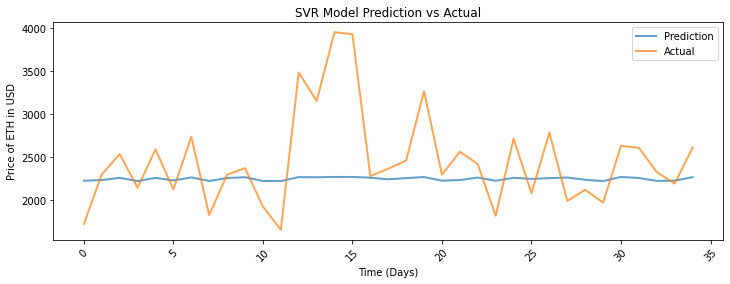

In [81]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('SVR Model Prediction vs Actual')
plt.ylabel('Price of ETH in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lr_confidence = lr.score(x_test, y_test)
print("lr accuracy:", lr_confidence)

lr accuracy: 0.1695109181663682


In [84]:
lr_prediction = lr.predict(x_test)
print(lr_prediction)

[1835.34855563 2210.64216387 2484.63322339 1973.14827911 2476.45792387
 2150.66070896 3062.08584087 1895.7818178  3403.92681377 2592.12953497
 1903.34956874 1937.78994709 2641.42600918 2984.31266185 2716.34760554
 2705.25955408 2504.14257765 2298.39182084 3501.02053456 2683.35713812
 2120.423771   2208.45598365 3128.40494736 2101.74915366 2483.73342158
 2348.68921681 3516.9424513  2536.53908968 2245.43049432 1981.77546877
 2794.76596302 2456.35909002 2075.39762555 2131.03208289 2619.5023746 ]


In [85]:
print(y_test)

[1723.15380859 2299.18774414 2534.48168945 2143.22558594 2590.26318359
 2124.77661133 2736.48852539 1826.19494629 2295.70556641 2372.00195312
 1924.6854248  1654.74157715 3484.72900391 3152.44287109 3952.29394531
 3928.84472656 2279.51416016 2364.75170898 2460.67919922 3265.44335938
 2296.54541016 2561.85205078 2419.90625    1817.62414551 2714.9453125
 2079.6574707  2784.29418945 1989.73632812 2120.02636719 1971.07727051
 2630.5769043  2608.26708984 2324.67944336 2191.3737793  2610.93676758]


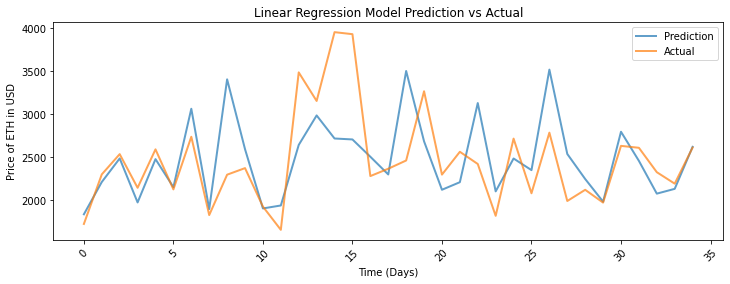

In [86]:
plt.figure(figsize=(12,4))
plt.plot(lr_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Linear Regression Model Prediction vs Actual, accuracy: 0.169')
plt.ylabel('Price of ETH in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [87]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [88]:
tree_confidence = tree.score(x_test, y_test)
print("Decision tree accuracy:", tree_confidence)

Decision tree accuracy: -0.34839855002971953


In [89]:
tree_prediction = tree.predict(x_test)
print(tree_prediction)

[1868.04882812 2025.20275879 2211.62573242 1977.27685547 2211.62573242
 1575.85314941 4079.05737305 1533.27502441 2109.57983398 2178.49902344
 1533.27502441 1806.97180176 2855.12646484 3014.84594727 2390.30541992
 3902.64770508 3167.85620117 2146.69238281 3380.07006836 2367.66357422
 2298.33349609 2025.20275879 3715.1484375  2150.0402832  2211.62573242
 2827.32885742 3380.07006836 3322.21166992 2166.1887207  1977.27685547
 3156.50952148 3013.73266602 1788.21704102 2135.94213867 2353.76879883]


In [90]:
print(y_test)

[1723.15380859 2299.18774414 2534.48168945 2143.22558594 2590.26318359
 2124.77661133 2736.48852539 1826.19494629 2295.70556641 2372.00195312
 1924.6854248  1654.74157715 3484.72900391 3152.44287109 3952.29394531
 3928.84472656 2279.51416016 2364.75170898 2460.67919922 3265.44335938
 2296.54541016 2561.85205078 2419.90625    1817.62414551 2714.9453125
 2079.6574707  2784.29418945 1989.73632812 2120.02636719 1971.07727051
 2630.5769043  2608.26708984 2324.67944336 2191.3737793  2610.93676758]


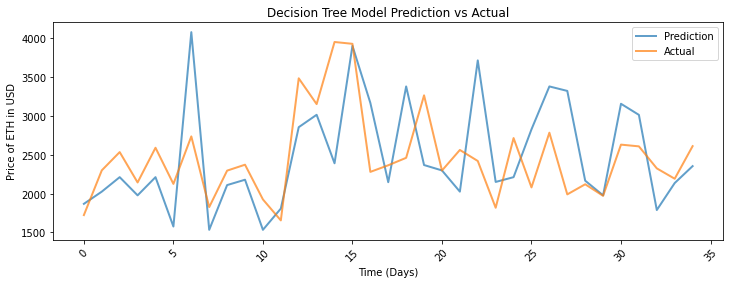

In [91]:
plt.figure(figsize=(12,4))
plt.plot(tree_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Decision Tree Model Prediction vs Actual, accuracy: -0.34')
plt.ylabel('Price of ETH in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [93]:
rf_confidence = rf.score(x_test, y_test)
print("rf confidence:", rf_confidence)

rf confidence: 0.12509183561586268


In [94]:
rf_prediction = rf.predict(x_test)
print(rf_prediction)

[1840.61867786 2111.52357935 2474.17278491 1945.43654126 2475.9135553
 1609.47135632 3774.01538794 1666.96620911 2497.98578442 2346.42201587
 1710.71230798 1882.48594043 2710.35471021 3299.12388501 2784.43466064
 3455.03993384 2845.28166968 2159.86735193 3059.7262395  2434.1783667
 2235.6834469  2111.97049878 3603.63337012 2115.47054028 2474.17278491
 2704.75914941 3080.59393726 2967.92112036 2213.98479443 2014.13930823
 3108.16455298 2845.0719801  1795.71270068 1983.92850732 2450.08274683]


In [95]:
print(y_test)

[1723.15380859 2299.18774414 2534.48168945 2143.22558594 2590.26318359
 2124.77661133 2736.48852539 1826.19494629 2295.70556641 2372.00195312
 1924.6854248  1654.74157715 3484.72900391 3152.44287109 3952.29394531
 3928.84472656 2279.51416016 2364.75170898 2460.67919922 3265.44335938
 2296.54541016 2561.85205078 2419.90625    1817.62414551 2714.9453125
 2079.6574707  2784.29418945 1989.73632812 2120.02636719 1971.07727051
 2630.5769043  2608.26708984 2324.67944336 2191.3737793  2610.93676758]


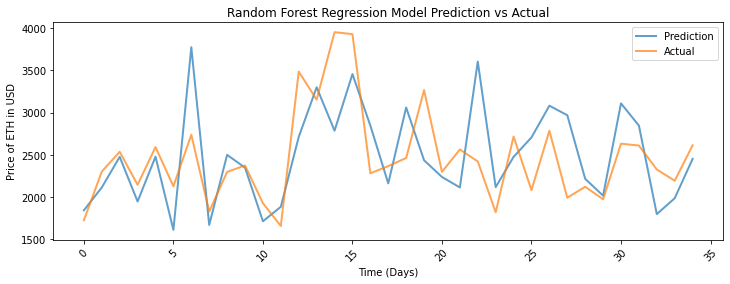

In [96]:
plt.figure(figsize=(12,4))
plt.plot(rf_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Random Forest Regression Model Prediction vs Actual, accuracy: 0.125')
plt.ylabel('Price of ETH in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Try Bitcoin

In [97]:
from sklearn.svm import SVR
future_days = 10

In [98]:
bitcoin_2021[str(future_days)+'_Day_Price_Forecast'] = bitcoin_2021[['Close']].shift(-future_days)
bitcoin_2021[['Close', str(future_days)+'_Day_Price_Forecast']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,10_Day_Price_Forecast
Date,,
2021-02-19,55888.132812,49631.242188
2021-02-20,56099.519531,48378.988281
2021-02-21,57539.945312,50538.242188
2021-02-22,54207.320312,48561.167969
2021-02-23,48824.425781,48927.304688
...,...,...
2021-08-15,47047.003906,NaN
2021-08-16,46004.484375,NaN
2021-08-17,44695.359375,NaN


In [99]:
import numpy as np
X = np.array(bitcoin_2021[['Close']])
X = X[:etherum_2021.shape[0] - future_days]

In [100]:
X = np.array(bitcoin_2021[['Close']])
X = X[:bitcoin_2021.shape[0] - future_days]

In [101]:
y = np.array(bitcoin_2021[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [103]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [104]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)


svr_rbf accuracy: -0.010625179634314641


In [105]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[45580.46775369 45581.07896926 45671.24351728 45636.50704019
 45658.63376779 45580.32928921 45632.49053462 45582.56747987
 45647.90378365 45579.77818497 45665.81446033 45651.74676788
 45631.750862   45580.39755739 45591.04174198 45672.42255338
 45672.87350168 45670.87495145 45580.1715673  45593.79668575
 45584.22470492 45579.76334976 45580.49127573 45590.18958498
 45597.68466796 45579.77690573 45669.57561929 45590.55344929
 45579.98413433 45670.29142579 45579.76831915 45580.82992246
 45667.21877402 45670.17361146 45668.83061269]


In [106]:
print(y_test)

[37345.12109375 33581.55078125 57356.40234375 51206.69140625
 57200.29296875 40406.26953125 39294.19921875 40218.4765625
 57424.0078125  32702.02539062 54021.75390625 48912.3828125
 52246.5234375  35867.77734375 42816.5        55724.265625
 50538.2421875  58803.77734375 35787.24609375 43798.1171875
 36684.92578125 38152.98046875 35040.8359375  39097.859375
 35678.12890625 35287.78125    48561.16796875 35551.95703125
 34668.546875   59095.80859375 33472.6328125  31796.81054688
 49880.53515625 56473.03125    57828.05078125]


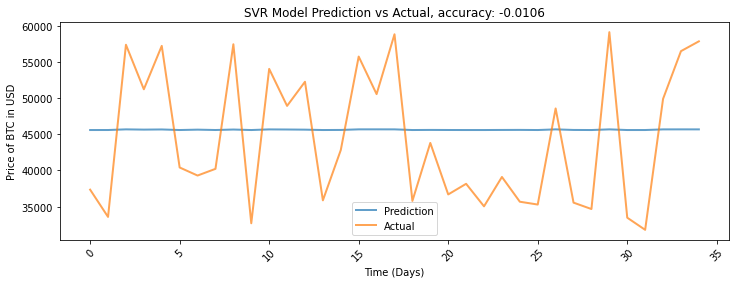

In [130]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('SVR Model Prediction vs Actual, accuracy: -0.0106')
plt.ylabel('Price of BTC in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lr_confidence = lr.score(x_test, y_test)
print("lr accuracy:", lr_confidence)

lr accuracy: 0.8064383762893841


In [110]:
lr_prediction = lr.predict(x_test)
print(lr_prediction)

[37444.08156074 35084.9567429  52786.5698054  46493.20048103
 49663.79896322 37344.06649068 45987.62894653 38408.21135393
 48007.55559588 36643.79688884 57970.49641946 48563.29258394
 45895.44168133 37394.73047138 40399.87058611 55332.59739836
 54773.70513611 52621.36224973 35695.80884674 40876.65759766
 38917.29734987 36345.66527968 37460.06848975 40242.77880439
 41490.44977298 36638.95405386 52131.96962362 40310.50108295
 35894.29386241 52387.076174   36602.19619329 35223.95137053
 51439.33275081 56559.86281551 51893.1875144 ]


In [111]:
print(y_test)

[37345.12109375 33581.55078125 57356.40234375 51206.69140625
 57200.29296875 40406.26953125 39294.19921875 40218.4765625
 57424.0078125  32702.02539062 54021.75390625 48912.3828125
 52246.5234375  35867.77734375 42816.5        55724.265625
 50538.2421875  58803.77734375 35787.24609375 43798.1171875
 36684.92578125 38152.98046875 35040.8359375  39097.859375
 35678.12890625 35287.78125    48561.16796875 35551.95703125
 34668.546875   59095.80859375 33472.6328125  31796.81054688
 49880.53515625 56473.03125    57828.05078125]


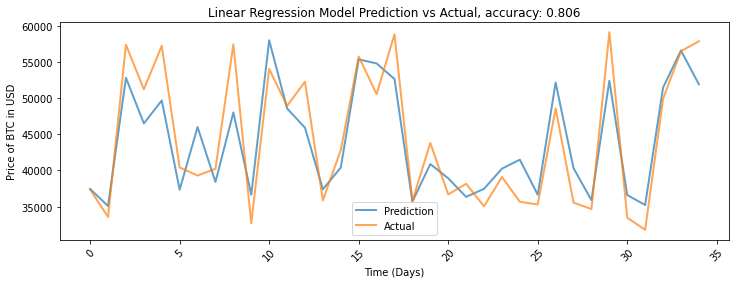

In [129]:
plt.figure(figsize=(12,4))
plt.plot(lr_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Linear Regression Model Prediction vs Actual, accuracy: 0.806')
plt.ylabel('Price of BTC in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [113]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [114]:
tree_confidence = tree.score(x_test, y_test)
print("Decision tree accuracy:", tree_confidence)

Decision tree accuracy: 0.5079046709913335


In [115]:
tree_prediction = tree.predict(x_test)
print(tree_prediction)

[33560.70703125 34292.4453125  59057.87890625 38402.22265625
 58870.89453125 32505.66015625 46547.10546875 34616.06640625
 55907.19921875 33855.328125   54738.9453125  34770.58203125
 46547.10546875 32505.66015625 44428.2890625  37002.44140625
 58918.83203125 58346.65234375 29807.34765625 44555.80078125
 35552.515625   32110.69335938 33560.70703125 44428.2890625
 47047.00390625 33855.328125   56396.515625   44428.2890625
 31780.73046875 59384.3125     33855.328125   34292.4453125
 58232.31640625 51762.2734375  56396.515625  ]


In [116]:
print(y_test)

[37345.12109375 33581.55078125 57356.40234375 51206.69140625
 57200.29296875 40406.26953125 39294.19921875 40218.4765625
 57424.0078125  32702.02539062 54021.75390625 48912.3828125
 52246.5234375  35867.77734375 42816.5        55724.265625
 50538.2421875  58803.77734375 35787.24609375 43798.1171875
 36684.92578125 38152.98046875 35040.8359375  39097.859375
 35678.12890625 35287.78125    48561.16796875 35551.95703125
 34668.546875   59095.80859375 33472.6328125  31796.81054688
 49880.53515625 56473.03125    57828.05078125]


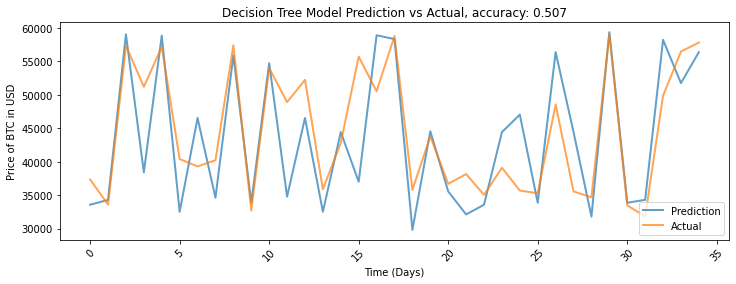

In [128]:
plt.figure(figsize=(12,4))
plt.plot(tree_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Decision Tree Model Prediction vs Actual, accuracy: 0.507')
plt.ylabel('Price of BTC in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [119]:
rf_confidence = rf.score(x_test, y_test)
print("rf confidence:", rf_confidence)

rf confidence: 0.734330830310868


In [120]:
rf_prediction = rf.predict(x_test)
print(rf_prediction)

[33856.27573047 34553.76196875 58426.71853906 42385.96712891
 59251.15021875 33417.20264453 47970.35125781 35234.70271484
 54638.36139453 34631.18776758 54510.17650391 41354.89891016
 47970.35125781 33168.46255859 41988.20051172 45683.80684375
 58432.05850391 58420.8674375  32259.43259375 43854.48108203
 35945.60732031 32075.04586914 33856.27573047 41409.86023047
 42155.56216797 34631.18776758 57284.50064453 41838.23766016
 31941.92314258 58749.40131641 34585.47872852 33942.33182031
 57933.21919141 54029.54646484 57131.59171484]


In [121]:
print(y_test)

[37345.12109375 33581.55078125 57356.40234375 51206.69140625
 57200.29296875 40406.26953125 39294.19921875 40218.4765625
 57424.0078125  32702.02539062 54021.75390625 48912.3828125
 52246.5234375  35867.77734375 42816.5        55724.265625
 50538.2421875  58803.77734375 35787.24609375 43798.1171875
 36684.92578125 38152.98046875 35040.8359375  39097.859375
 35678.12890625 35287.78125    48561.16796875 35551.95703125
 34668.546875   59095.80859375 33472.6328125  31796.81054688
 49880.53515625 56473.03125    57828.05078125]


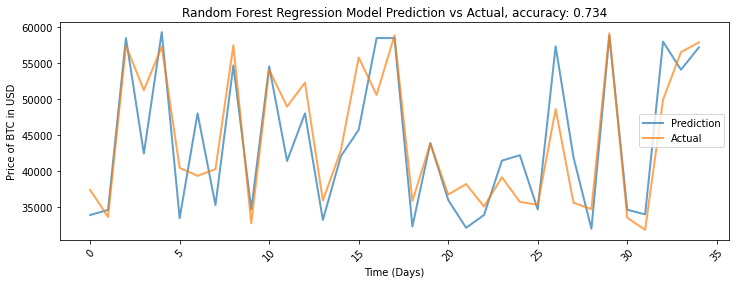

In [127]:
plt.figure(figsize=(12,4))
plt.plot(rf_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Random Forest Regression Model Prediction vs Actual, accuracy: 0.734')
plt.ylabel('Price of BTC in USD')
plt.xlabel('Time (Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()